# Chapter 3

## Multiple Linear Regression

Here we'll probably bail out into the statsmodels library to do our analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import math
import sklearn.linear_model

from sklearn.datasets import load_boston

sns.set(style="whitegrid")

In [2]:
boston = load_boston()
headers = ["CRIM", "ZN", "INDUS", "CHAS", "NOX",
           "RM", "AGE", "DIS", "RAD", "TAX",
           "PTRATIO", "B", "LSTAT", "MEDV"]
boston_array = np.concatenate((boston.data, boston.target[:, np.newaxis]), axis=1)

boston_dataframe = pd.DataFrame(data=boston_array, columns=headers)
boston_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


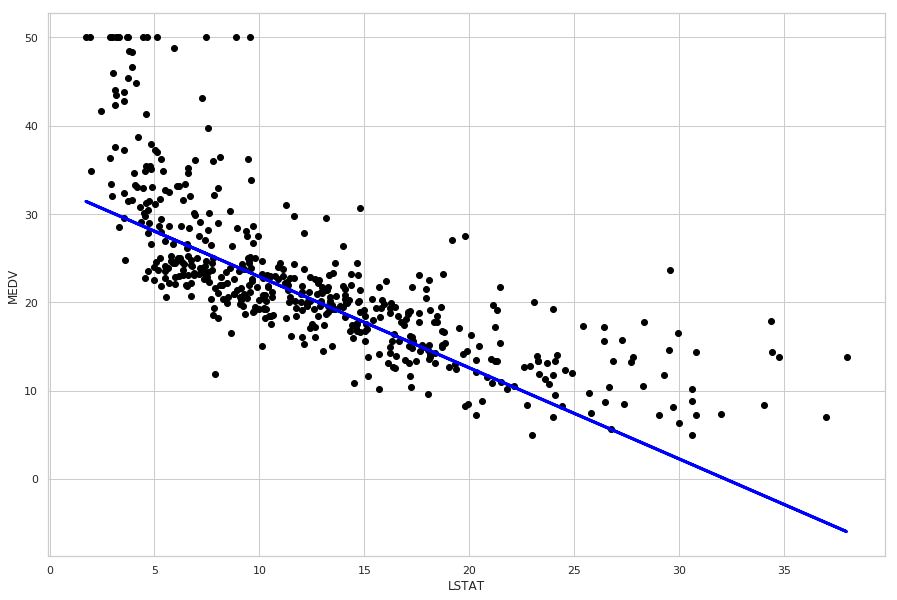

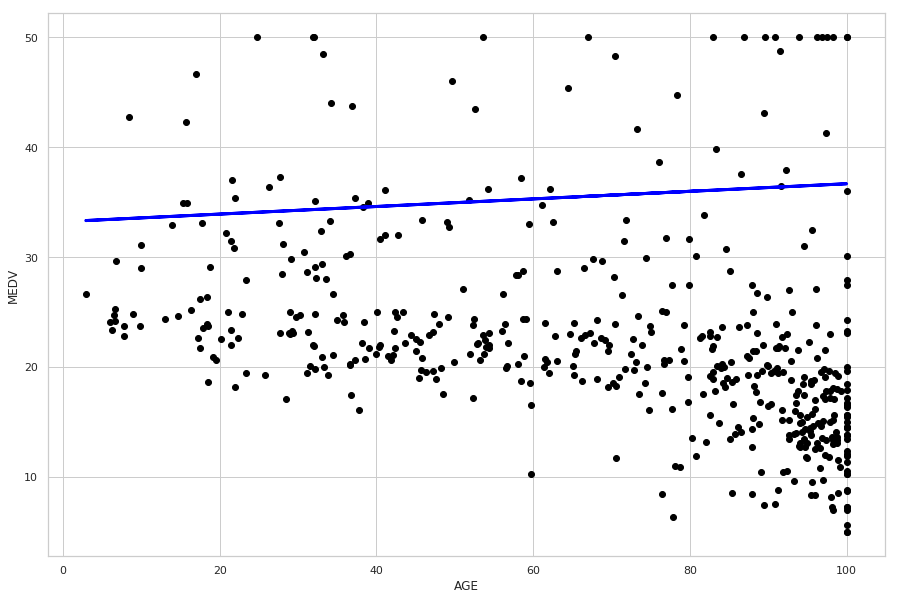

In [3]:
# Regression on AGE and LSTAT, predicting MEDV.


regr = sklearn.linear_model.LinearRegression()

# The X_train needs to be 2D to work with sklearn 
X_train = boston_dataframe[["LSTAT", "AGE"]].to_numpy()
y_train = boston_dataframe.MEDV
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_train)

B0 = regr.intercept_
B1, B2 = regr.coef_

# Plot the fit (projecting onto the LSTAT/MEDV plane)
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(X_train[:,0], y_train,  color='black')
plt.plot(X_train[:,0], B1*X_train[:,0]+B0, color='blue', linewidth=3)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()


# Plot the fit (projecting onto the AGE/MEDV plane)
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(X_train[:,1], y_train,  color='black')
plt.plot(X_train[:,1], B2*X_train[:,1]+B0, color='blue', linewidth=3)
plt.xlabel("AGE")
plt.ylabel("MEDV")

plt.show()

In [4]:
# Here we use the beefier "statsmodels" package to do the analysis that R would 
# do for us, giving the errors, t-values, p-values, etc.
import statsmodels.api as sm

# statsmodels doesn't assume there'll be an intercept, so you have to add one
X_train = sm.add_constant(boston_dataframe[["LSTAT", "AGE"]])
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 13 May 2019   Prob (F-statistic):           2.98e-88
Time:                        18:47:50   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

/home/wpg/.local/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [5]:
# Full regression on all free params
X_train = sm.add_constant(boston_dataframe.drop(columns="MEDV"))
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 13 May 2019   Prob (F-statistic):          6.72e-135
Time:                        18:47:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [6]:
# Check for multi-collinearity with the variance inflaction factor (VIF):
# the ratio of the variance of predicted B_j when fitting the full model over the variance of B_j
# if fit by itself
import statsmodels.stats.outliers_influence
for i, col in enumerate(X_train.columns[1:]): # exclude the "const"
    VIF = statsmodels.stats.outliers_influence.variance_inflation_factor(X_train.to_numpy(),i+1)
    print(f"{col}: {VIF:.2f}")

CRIM: 1.79
ZN: 2.30
INDUS: 3.99
CHAS: 1.07
NOX: 4.39
RM: 1.93
AGE: 3.10
DIS: 3.96
RAD: 7.48
TAX: 9.01
PTRATIO: 1.80
B: 1.35
LSTAT: 2.94


In R, if we wanted to e.g. exclude the AGE variable, we could do:

`lm.fit = lm(MEDV~.-AGE, data=Boston)`
or

`lm.ft1=update(lm.fit, ~.-AGE)`

the statsmodels formula api allows us to use the same syntax